#  Student Performance Indicator

### Life cycle of Machine learning Project
<ul>
<li> The Understanding the Problem Statement
<li> Data Collection
<li> Data Checks to perform
<li> Exploratory data analysis
<li> Data Pre-Processing

<li> Model Training
<li>Choose best model
</ul>

## 1.) Problem statement
<ul>
<li> This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
</ul>



## 2) Data Collection
<ul>
<li> Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
<li> The data consists of 8 column and 1000 rows.
</ul>

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Import the CSV Data as Pandas DataFrame

In [4]:

df = pd.read_csv('data/stud.csv')


#### Show Top 5 Records


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [6]:
df.shape

(1000, 8)

### 2.2 Dataset information
<ul>
<li>gender : sex of students -> (Male/female)
<li>race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
<li>parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
<li>lunch : having lunch before test (standard or free/reduced)
<li>test preparation course : complete or not complete before test
<li>math score
<li>reading score
<li>writing score
</ul>


## 3. Data Checks to perform
<ul>
<li>Check Missing values

<li>Check Missing values

<li>Check Missing values

<li>Check Missing values

<li>Check Missing values

<li>Check Missing values

</ul>


### 3.1 Check Missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There is no misssing values in data set

### 3.2 Check Duplicate values

In [8]:
df.duplicated().sum()


0

#### There is no duplicates in data set

### 3.3 Check data types


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight
<ul>
<li>From above description of numerical data, all means are very close to each other - between 66 and 68.05;
<li>All standard deviations are also close - between 14.6 and 15.19;
<li>While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17
</ul>

### 3.7 Exploring Data

In [12]:
cat_column_names = list(df.select_dtypes(['object']).columns)
num_column_names = list(df.select_dtypes(['int32','int64','float32','float64']).columns)
for col in cat_column_names:
    print("Categories in '{0}' variable  ".format(col),df[col].nunique()," and features are : ",df[col].unique()) 

Categories in 'gender' variable   2  and features are :  ['female' 'male']
Categories in 'race_ethnicity' variable   5  and features are :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable   6  and features are :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable   2  and features are :  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable   2  and features are :  ['none' 'completed']


In [13]:
print(num_column_names)
print(cat_column_names)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"


In [14]:
df['total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['prcentage']=df['total_Score']/300*100
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_Score,prcentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['prcentage'].count()
writing_full = df[df['writing_score'] == 100]['prcentage'].count()
math_full = df[df['math_score'] == 100]['prcentage'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_than_20=df[df['reading_score']<=20]['prcentage'].count()
writing_less_than_20=df[df['writing_score']<=20]['prcentage'].count()
math_less_than_20=df[df['math_score']<=20]['prcentage'].count()
print(f'Number of students with less than 20 marks in Maths: {math_less_than_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_than_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_than_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### Insight
<ul>
<li>From above values we get students have performed the worst in Maths
<li>Best performance is in reading section

</ul>

## 4. Exploring Data ( Visualization)

### 4.1 Visualize average score distribution to make some conclusion.
<ul>
<li>Histogram
<li>Kernel Distribution Function (KDE)
</ul>

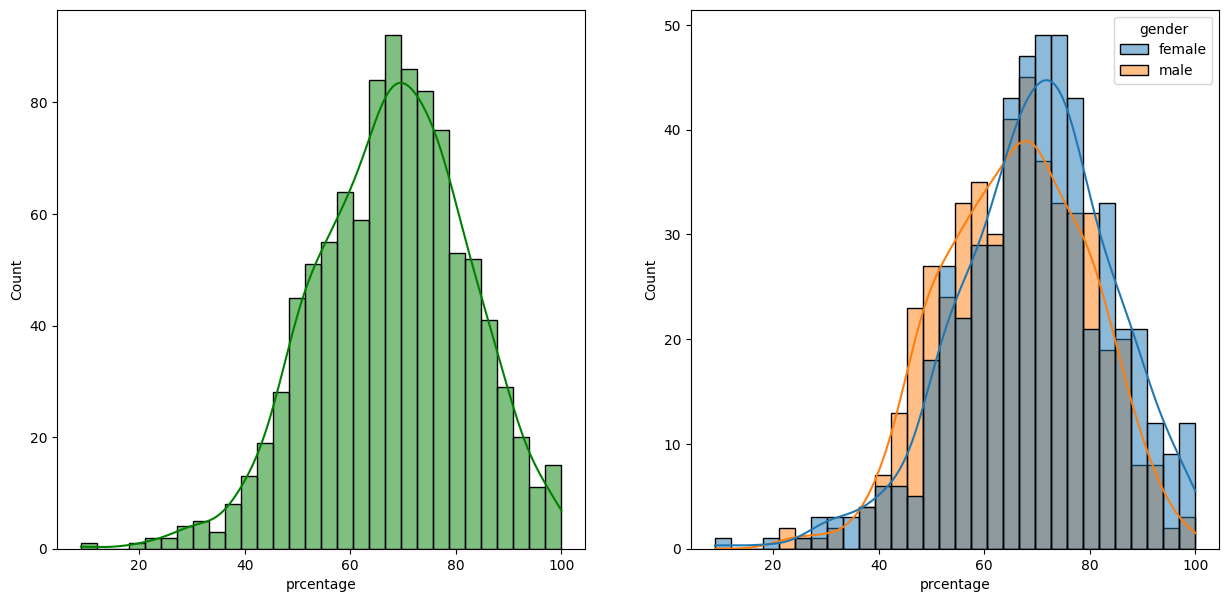

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='prcentage',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='prcentage',kde=True,hue='gender',bins=30)
plt.show()

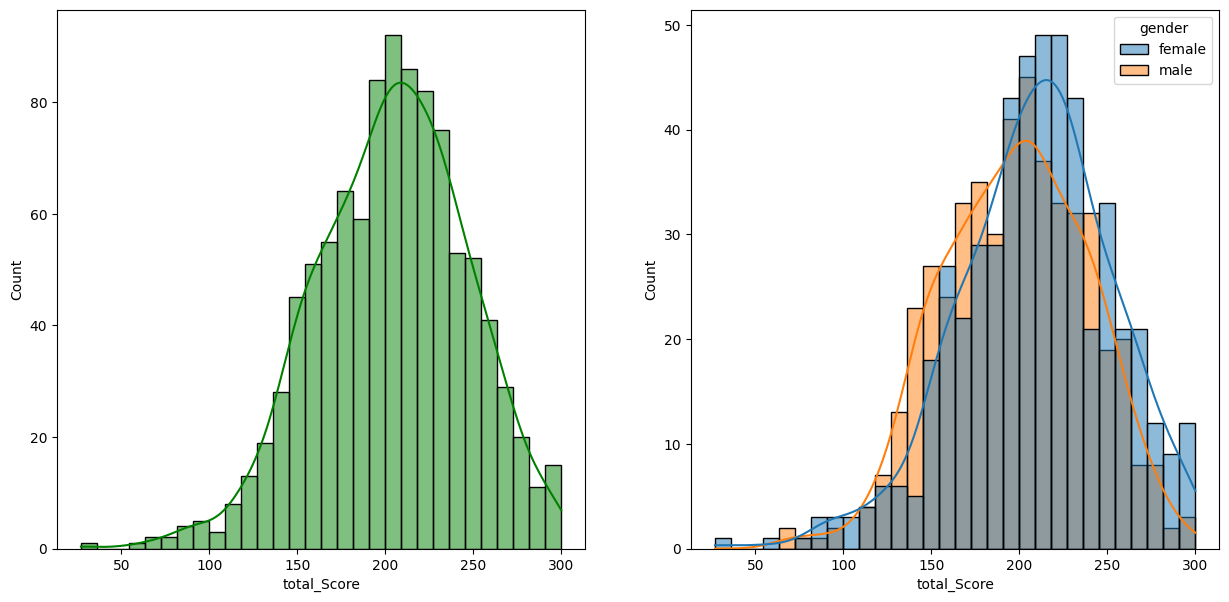

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_Score',kde=True,hue='gender',bins=30)
plt.show()

##### Insights
<ul>
<li>Female students tend to perform well then male students
</ul>

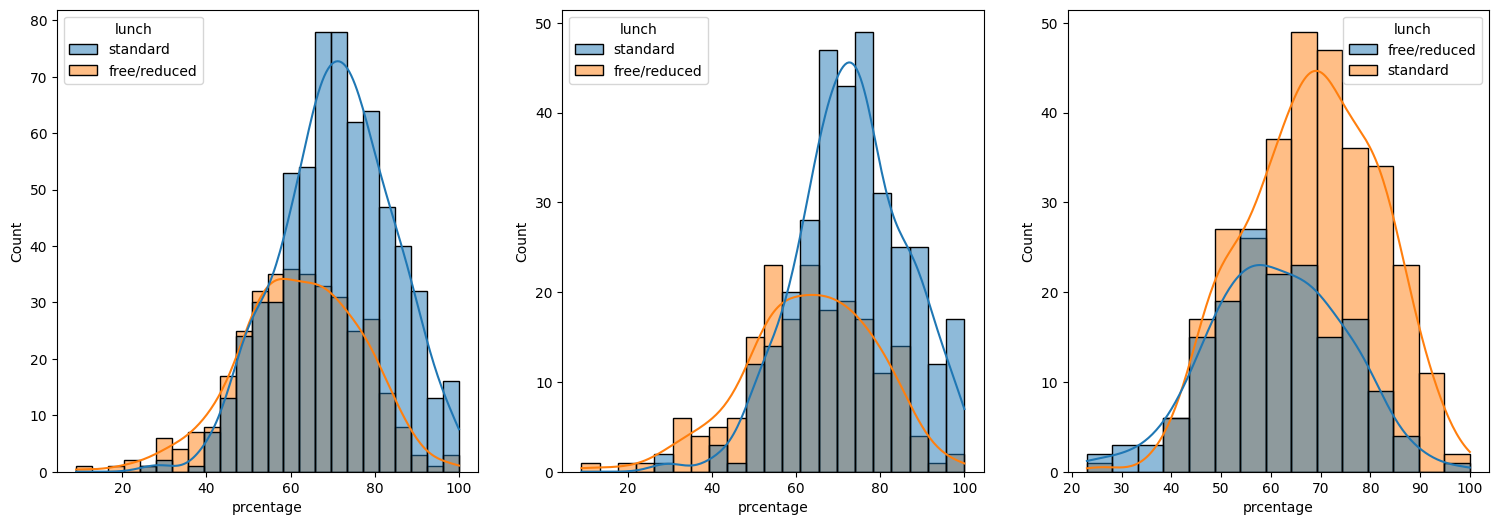

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='prcentage',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='prcentage',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='prcentage',kde=True,hue='lunch')
plt.show()

#### Insights
<ul>
<li>Standard lunch helps perform well in exams.
<li>Standard lunch helps perform well in exams be it a male or a female.
</ul>

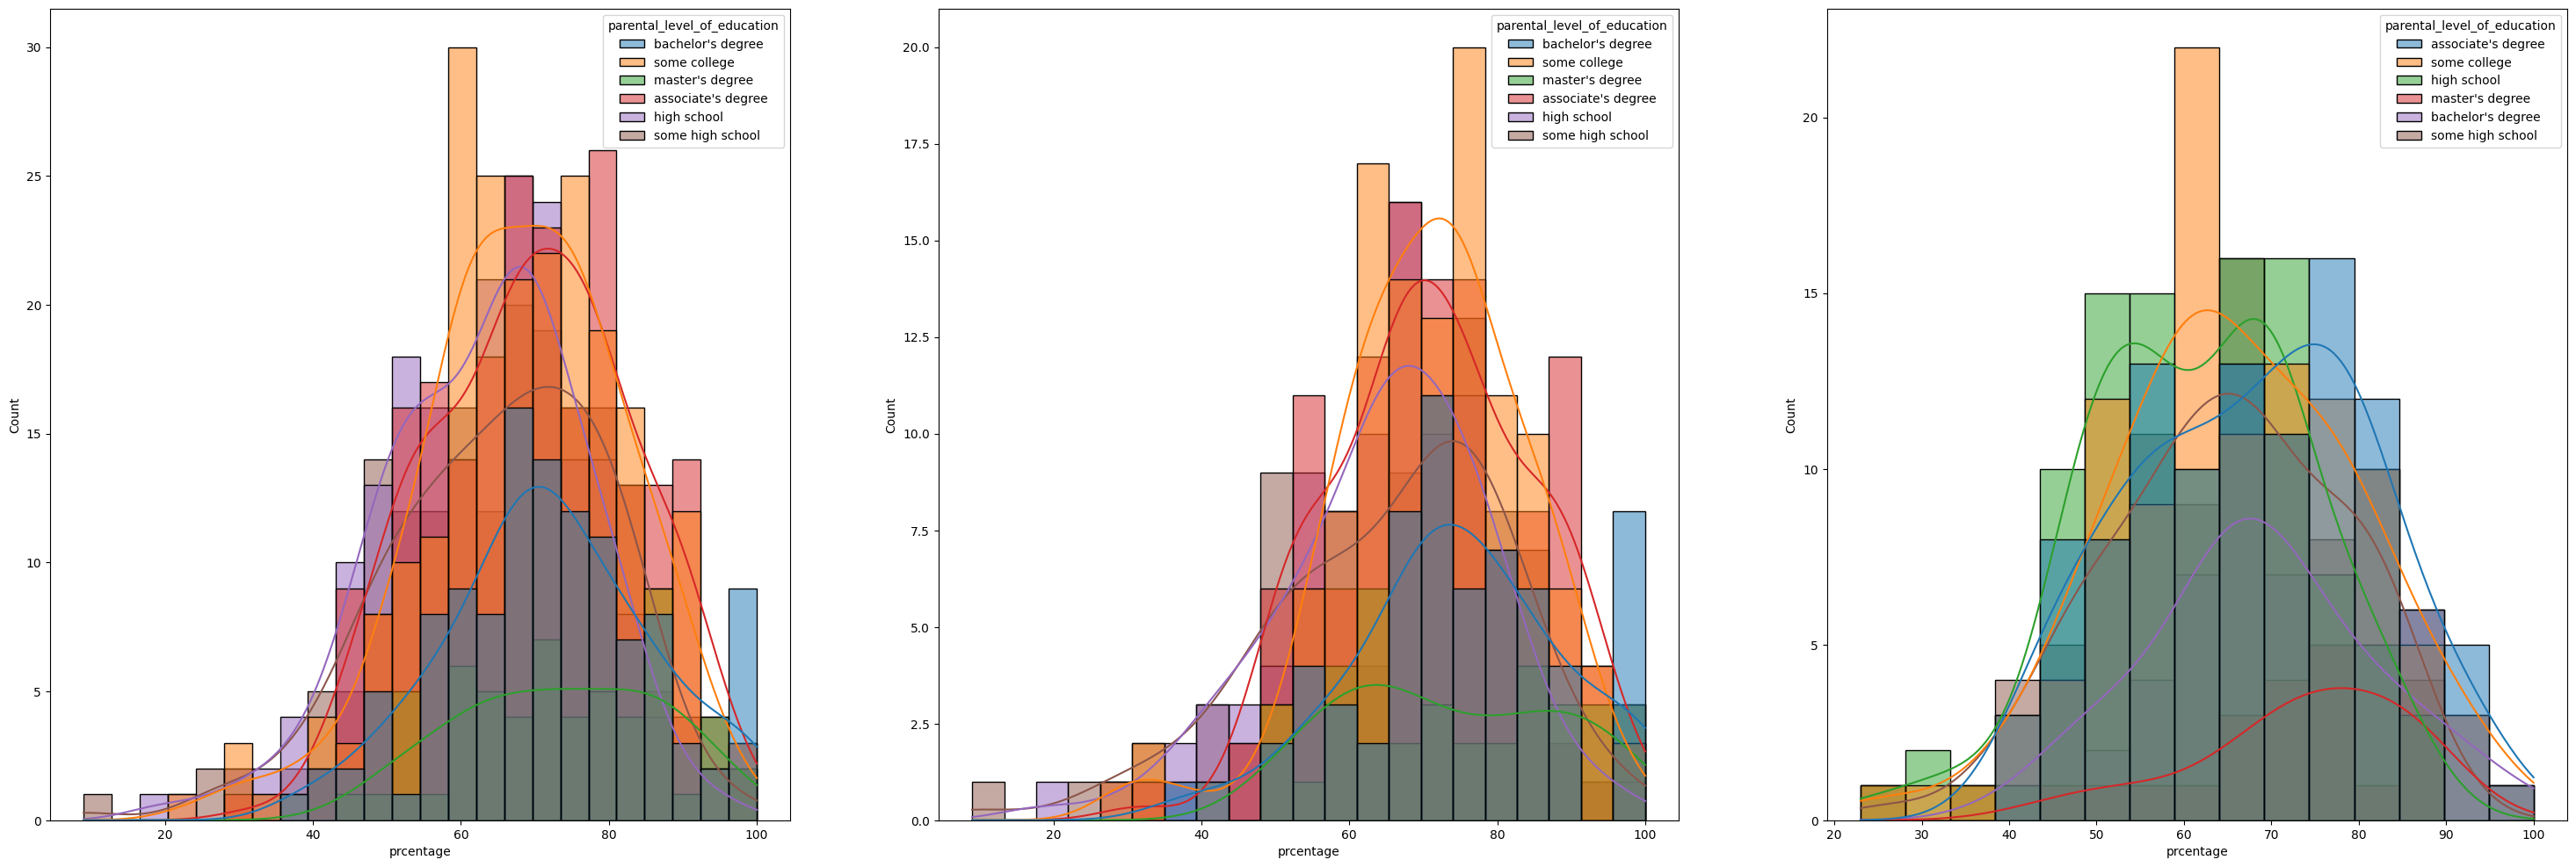

In [20]:
plt.subplots(1,3,figsize=(50,12))
plt.subplot(141)
sns.histplot(data=df,x='prcentage',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='prcentage',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='prcentage',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights
<ul>
<li>In general parent's education don't help student perform well in exam.

<li>2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

<li>3rd plot we can see there is no effect of parent's education on female students.

</ul>

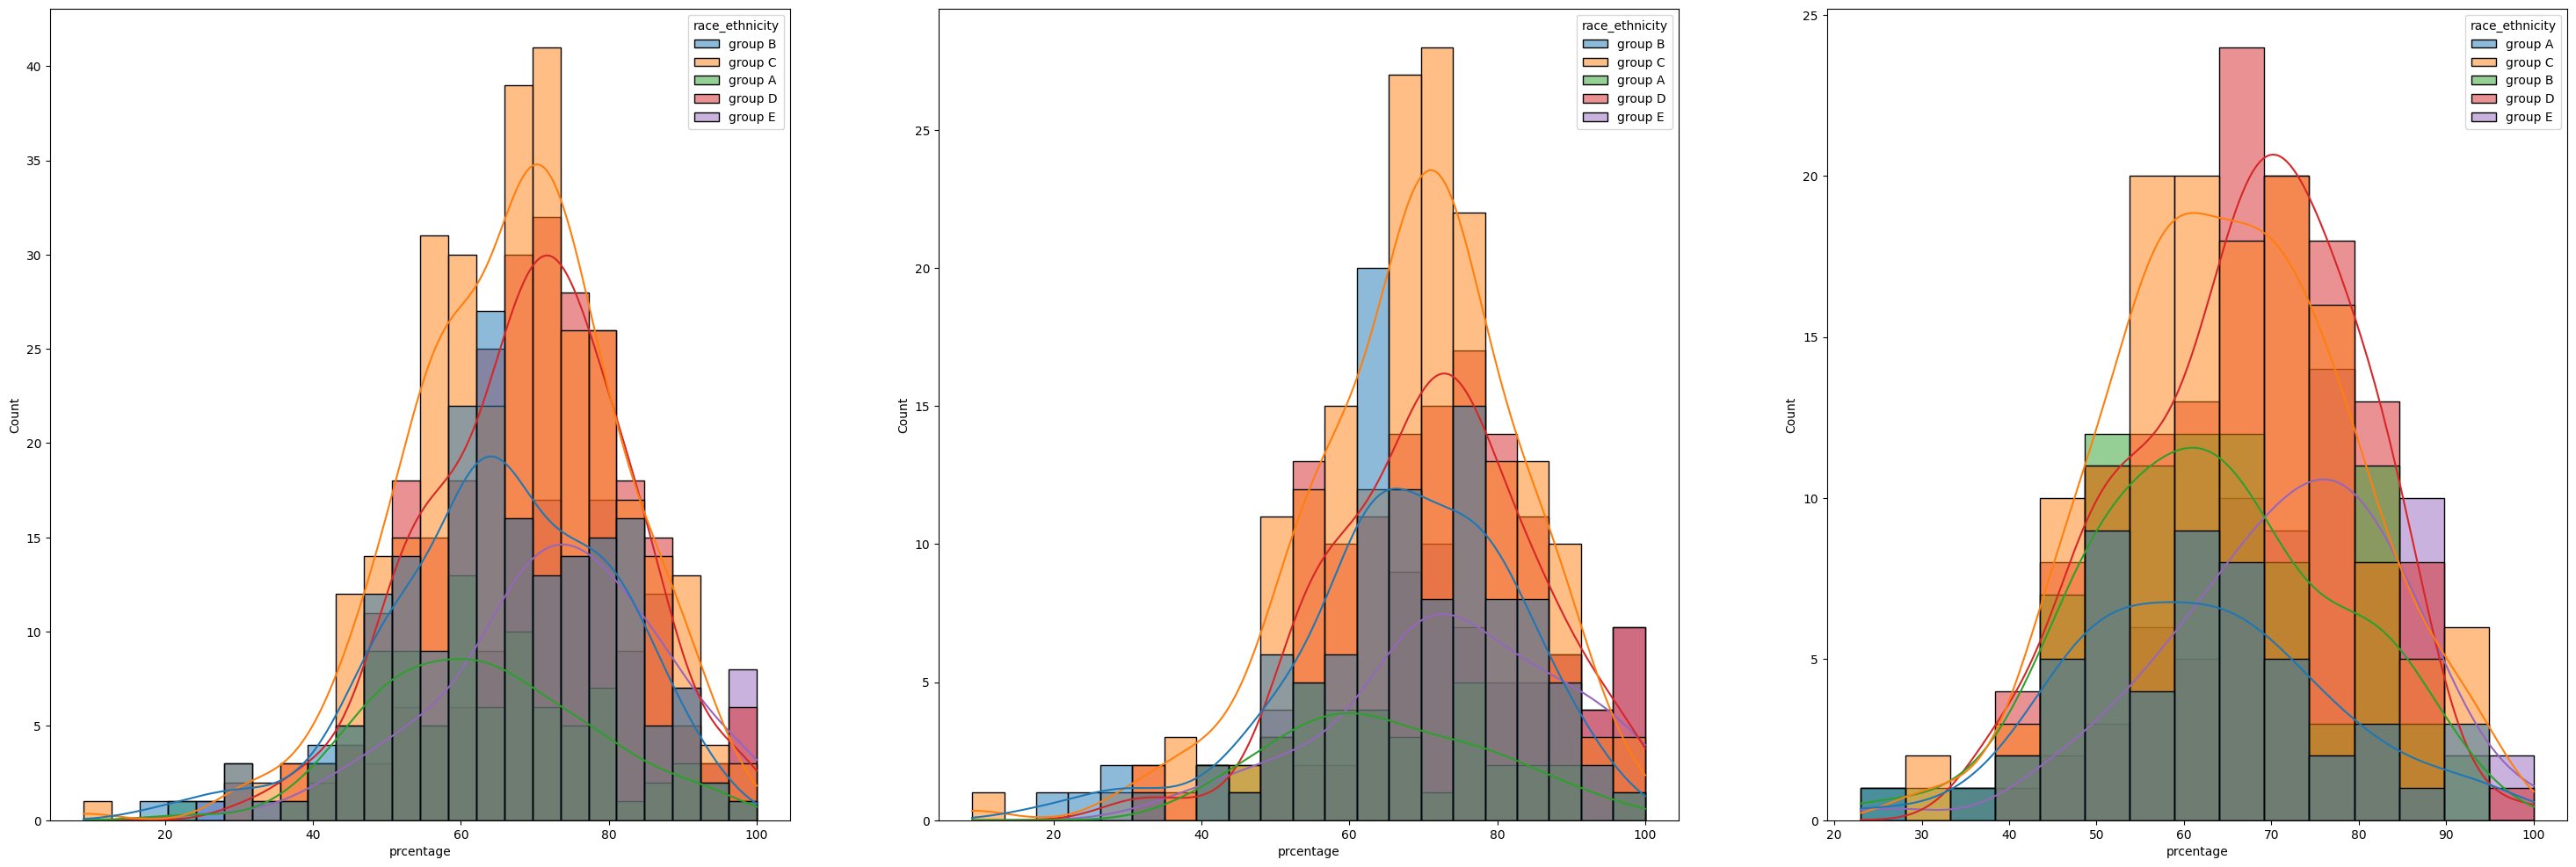

In [21]:

plt.subplots(1,3,figsize=(50,12))
plt.subplot(141)
sns.histplot(data=df,x='prcentage',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='prcentage',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='prcentage',kde=True,hue='race_ethnicity')
plt.show()

#### Insights
<ul>
<li>Students of group A and group E tends to perform poorly in exam.


<li>Students of group A and group E tends to perform poorly in exam in both genders.




</ul>

### 4.2 Maximumum score of students in all three subjects

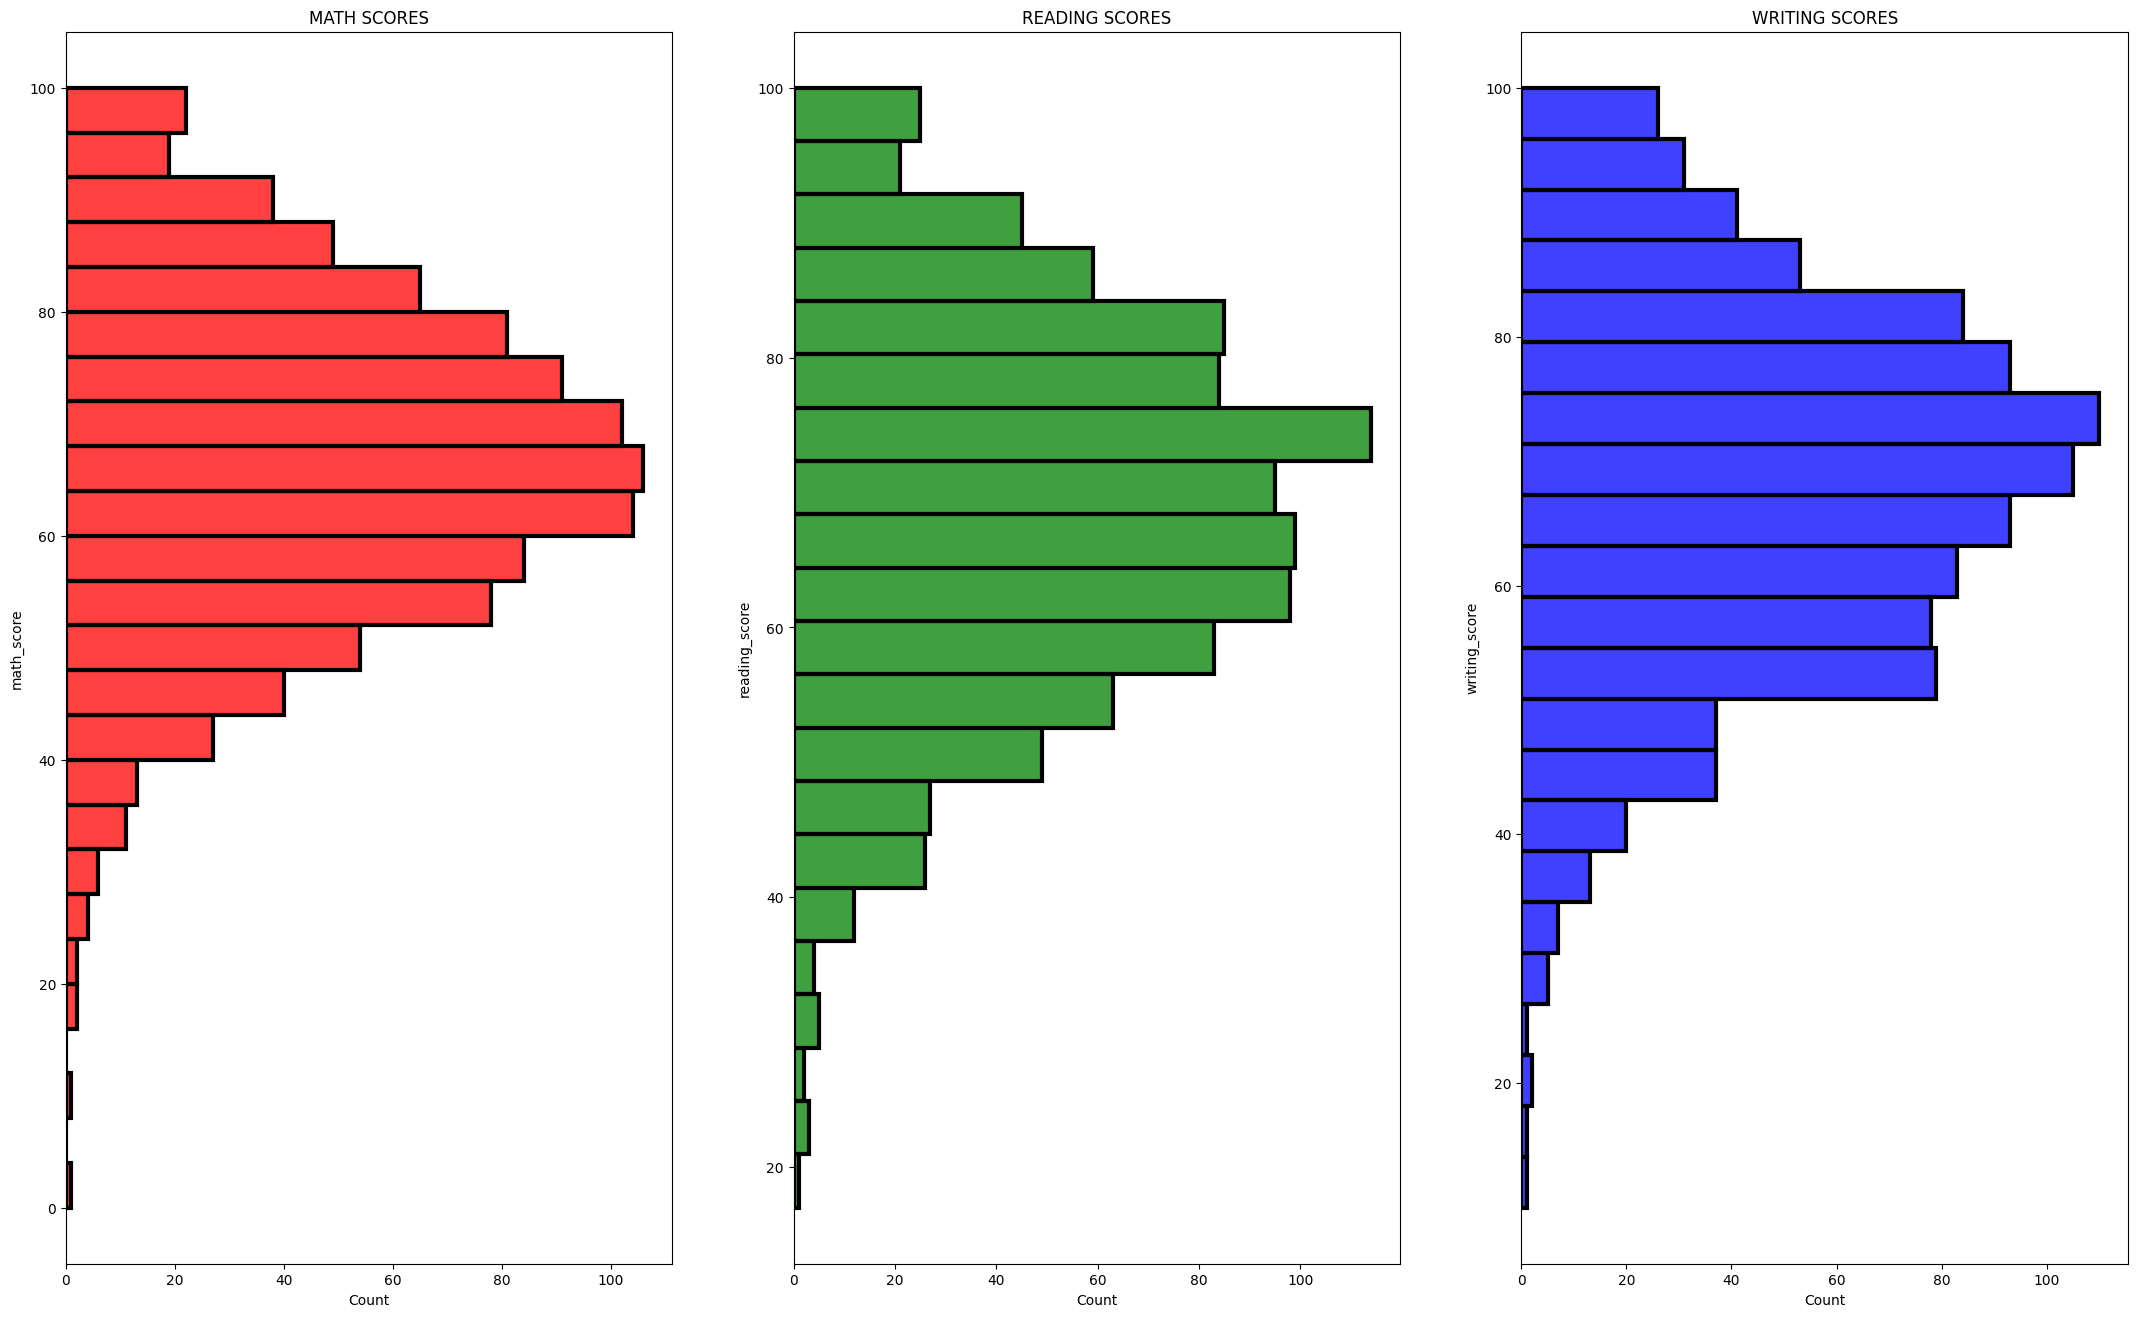

In [22]:
plt.figure(figsize=(36,16))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.histplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.histplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.histplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


##### Insights
<ul>
<Li>From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80
</ul>

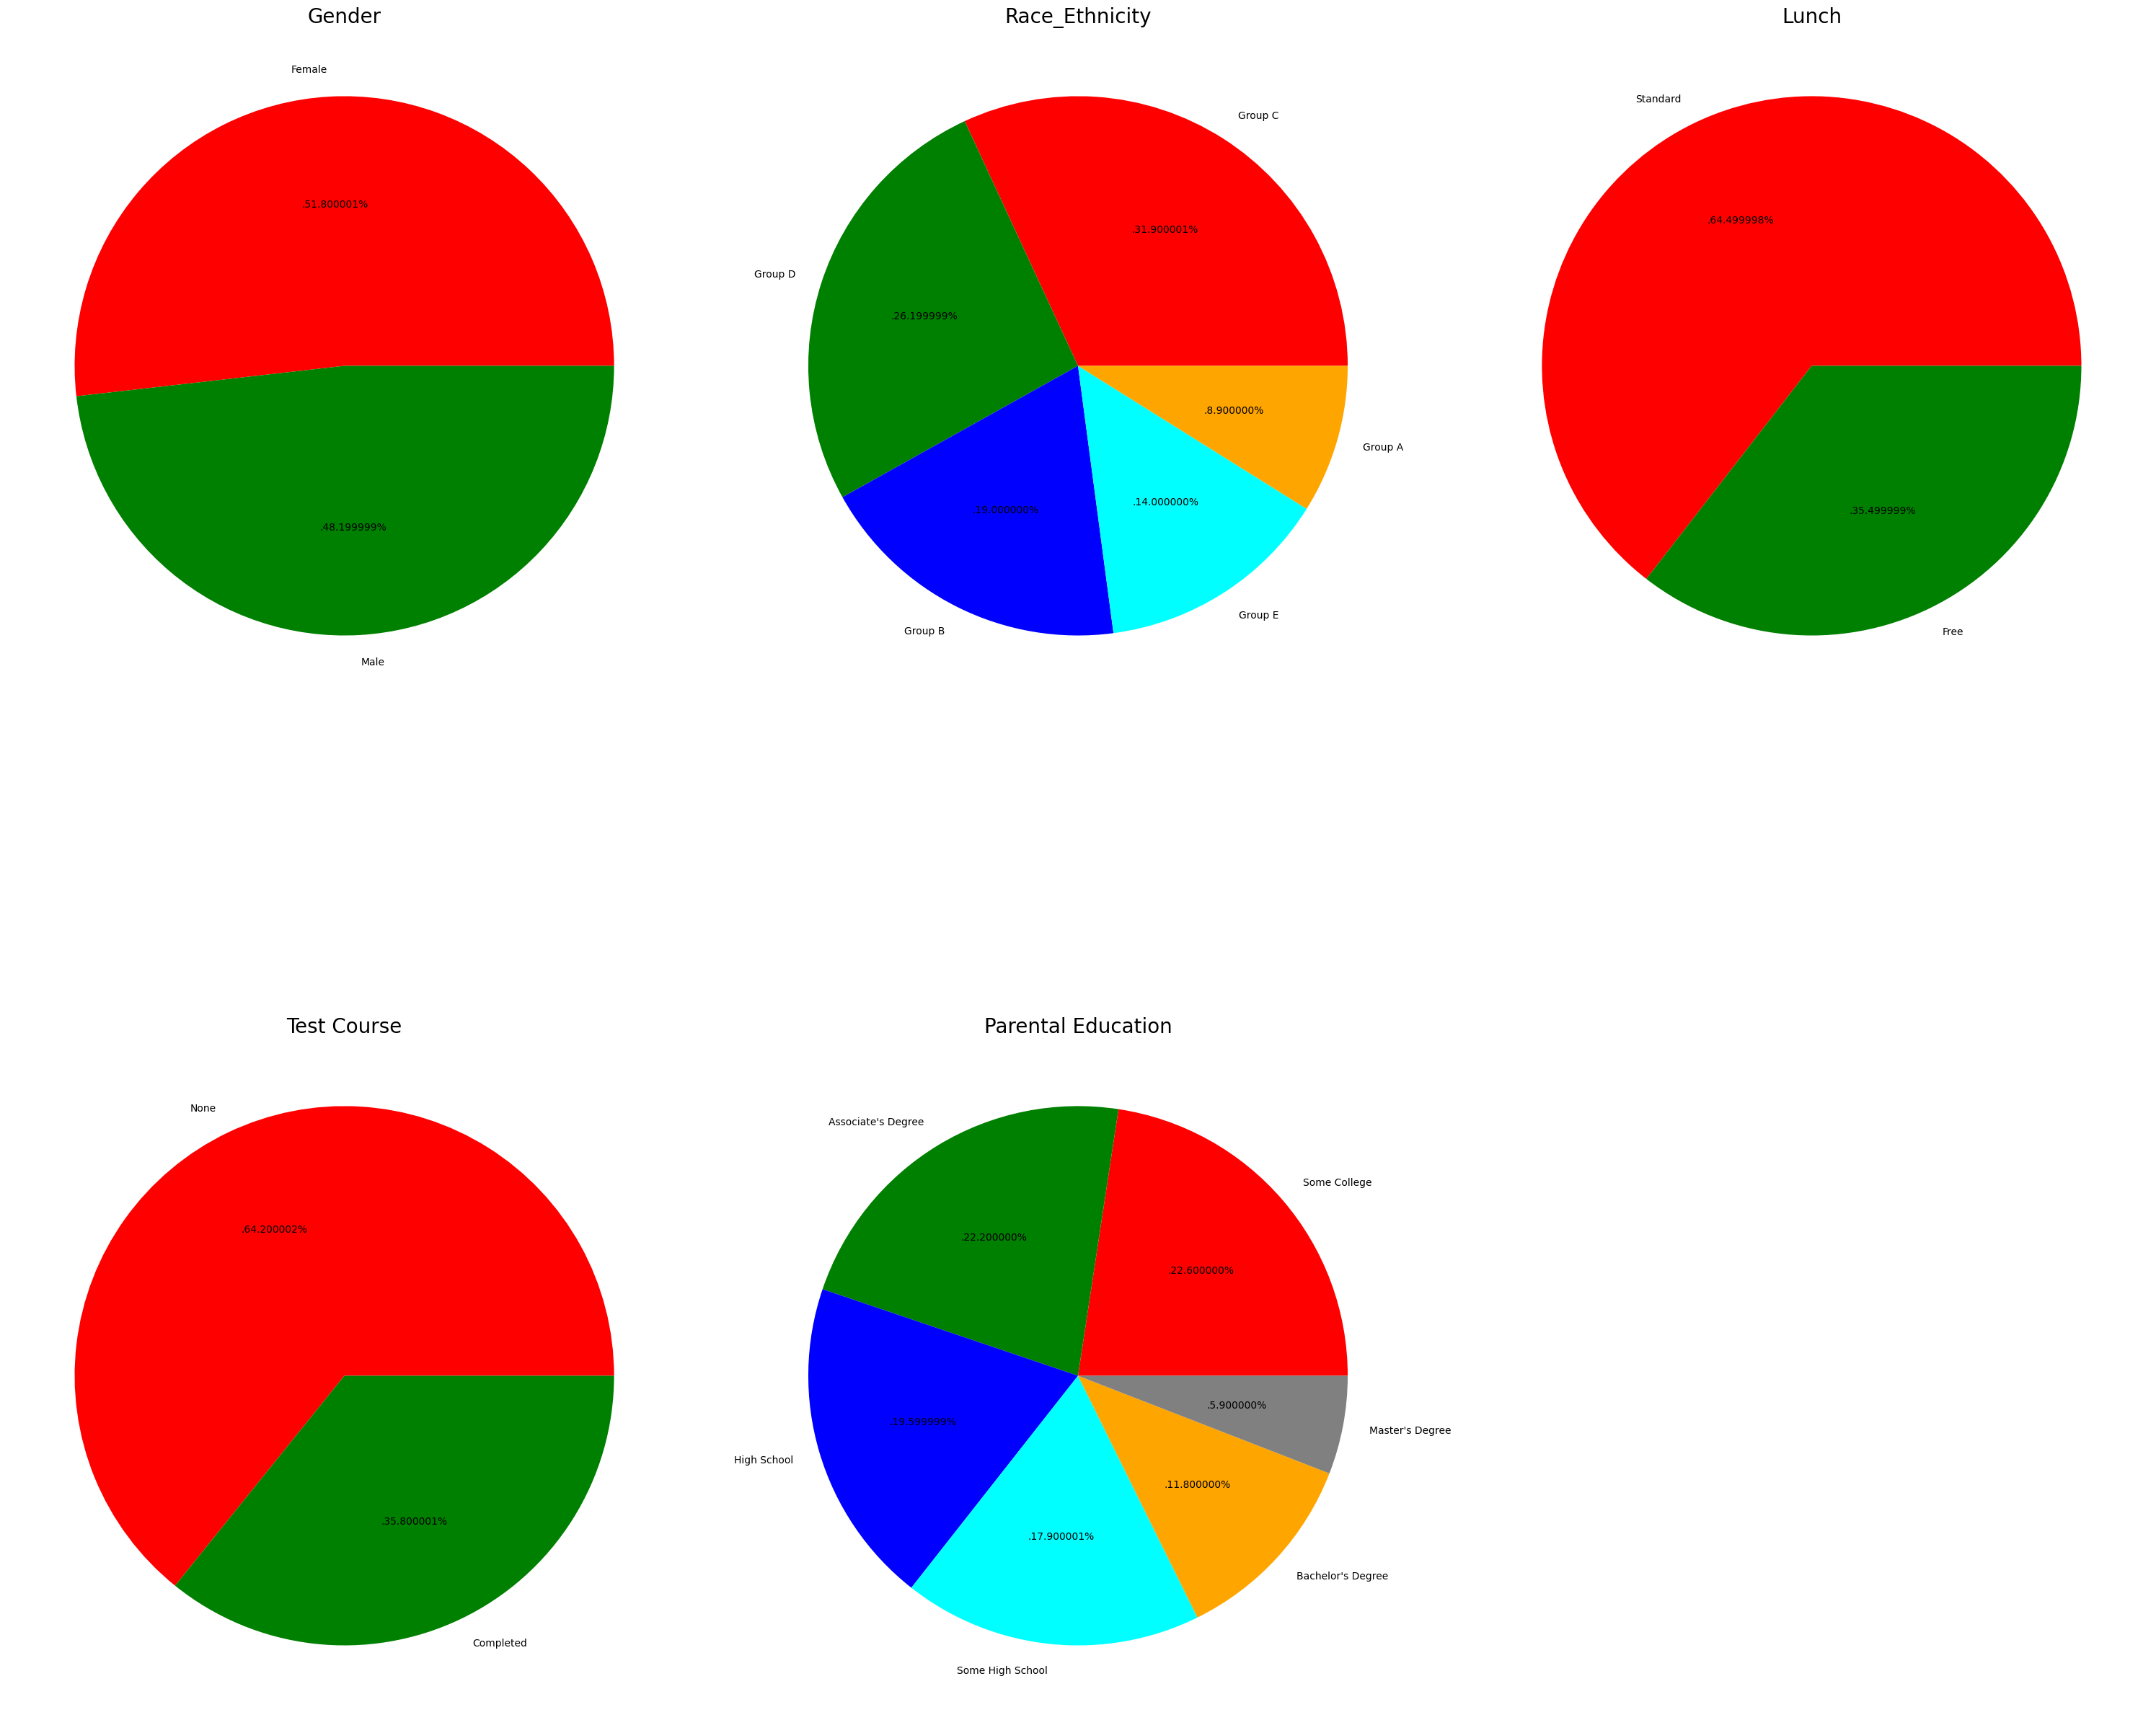

In [23]:
plt.rcParams['figure.figsize'] = (30, 30)

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']



plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


#### Insights
<ul>

<li>Number of Male and Female students is almost equal
<li>Number students are greatest in Group C
<li>Number of students who have standard lunch are greater
<li>Number of students who have not enrolled in any test preparation course is greater
<li>Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
</ul>

## 4.4 Feature Wise Visualization


### 4.4.1 GENDER COLUMN
<ul>
<li> How is distribution of Gender ?
<li>   gender has any impact on student's performance ?

</ul>

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )


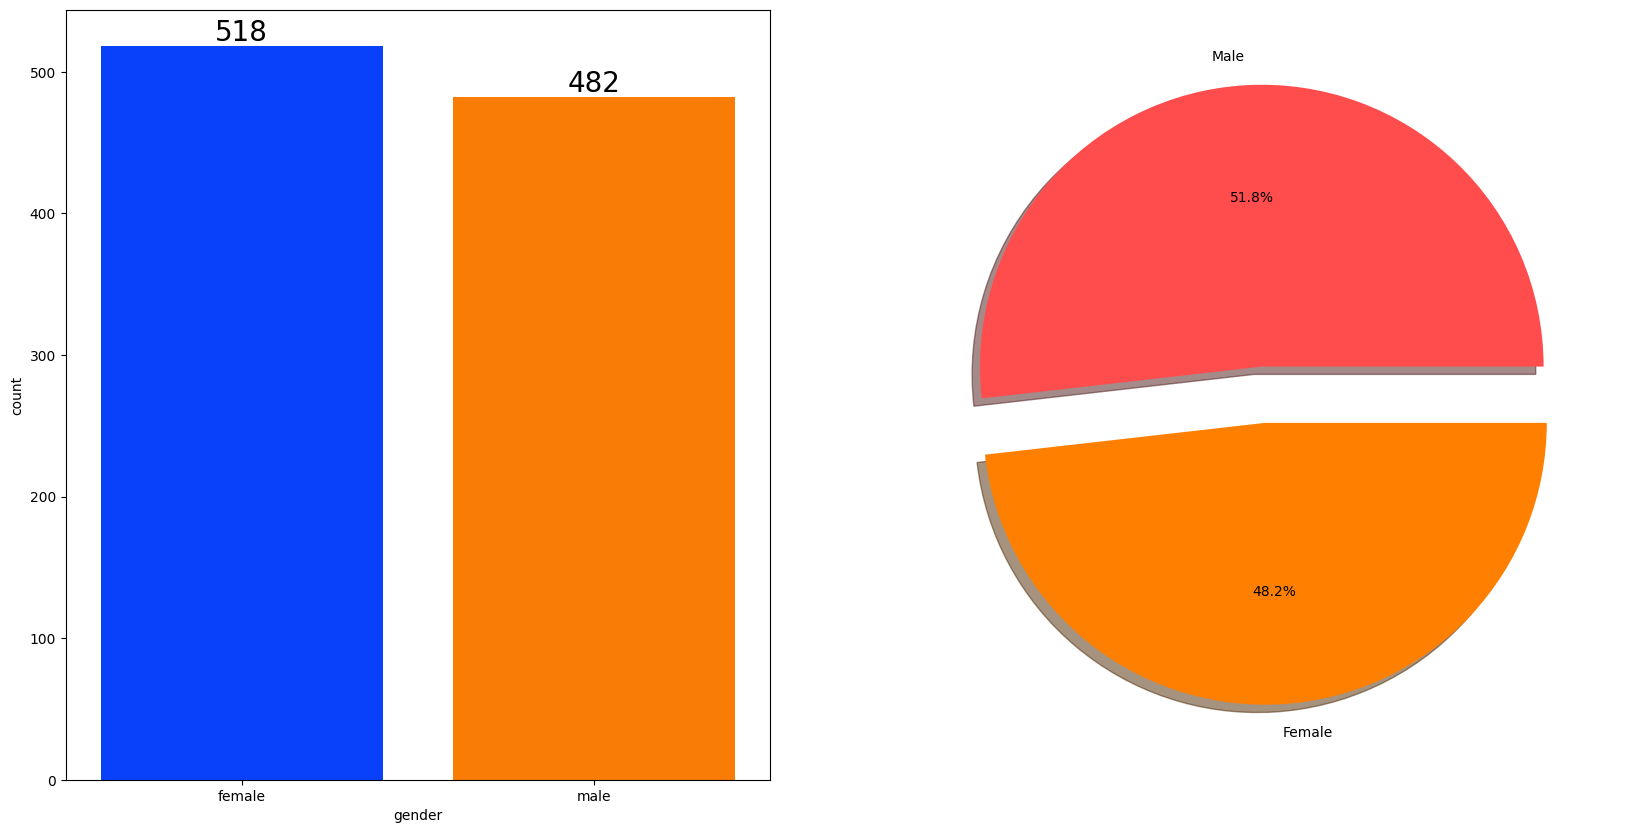

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )


In [25]:
gender_group = df.groupby('gender').mean()
gender_group


,math_score,reading_score,writing_score,total_Score,prcentage
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


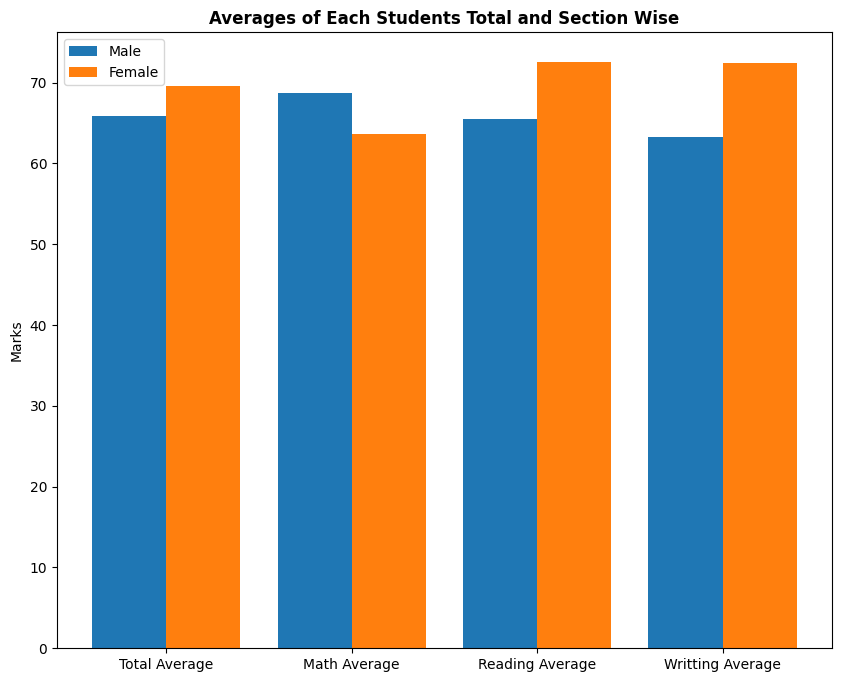

In [26]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average','Reading Average','Writting Average']


female_scores = [gender_group['prcentage'][0], gender_group['math_score'][0],gender_group['reading_score'][0],gender_group['writing_score'][0]]
male_scores = [gender_group['prcentage'][1], gender_group['math_score'][1],gender_group['reading_score'][1],gender_group['writing_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Averages of Each Students Total and Section Wise", fontweight='bold')
plt.legend()
plt.show()



##### Insights
<li>On an average females have a better overall score than men except in Maths.



### 4.4.2 RACE/EHNICITY COLUMN
<li> How is Group wise distribution ?
<li> Is Race/Ehnicity has any impact on student's performance ?


#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)


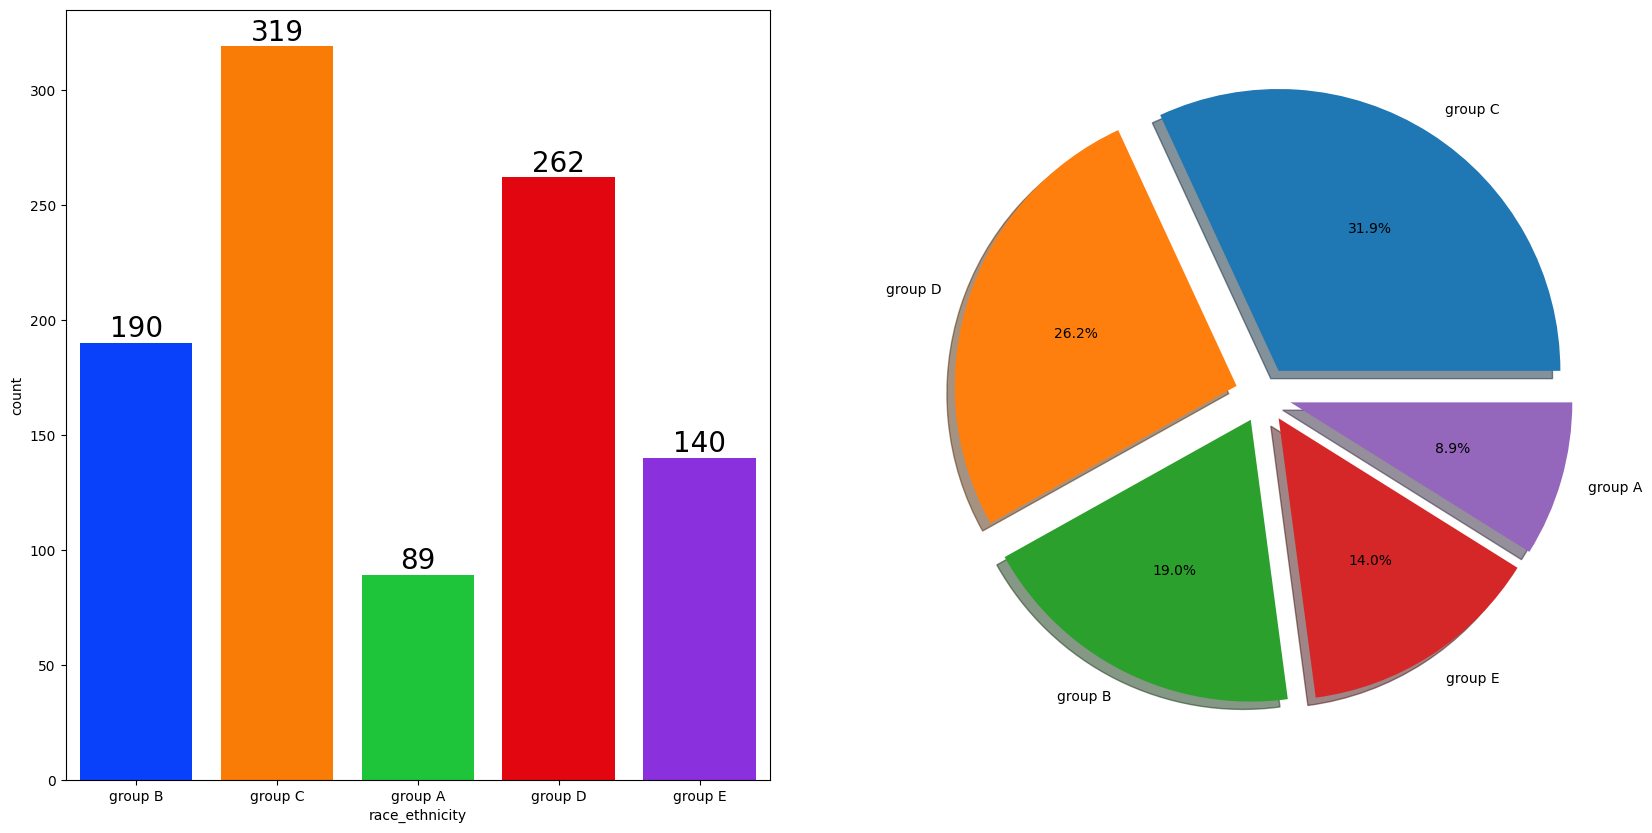

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()   

##### Insights
<li> Most of the student belonging from group C /group D.
<li> Lowest number of students belong to groupA.


#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )


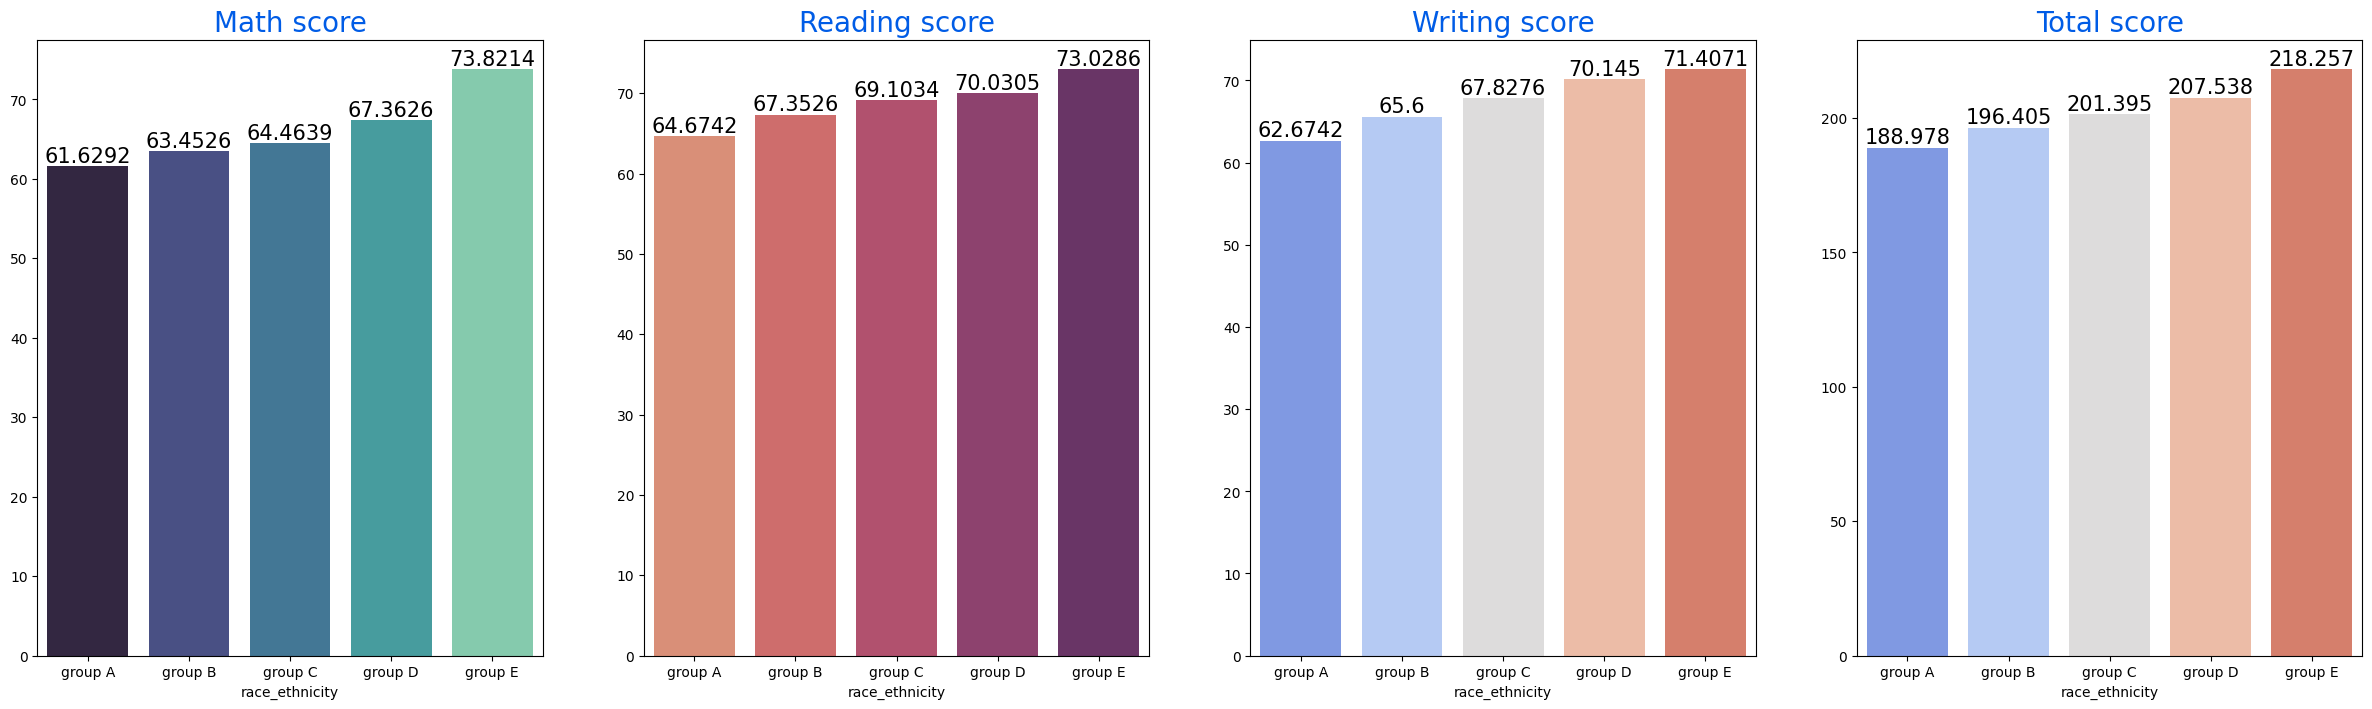

In [28]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,4,figsize=(30,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
    
sns.barplot(x=Group_data2['total_Score'].mean().index,y=Group_data2['total_Score'].mean().values,palette = 'coolwarm',ax=ax[3])
ax[3].set_title('Total score',color='#005ce6',size=20)

for container in ax[3].containers:
    ax[3].bar_label(container,color='black',size=15)

##### Insights
<li> Group E students have scored the highest marks.
<li> Group A students have scored the lowest marks.
<li> Students from a lower Socioeconomic status have a lower avg in all course subjects


### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
<li> What is educational background of student's parent ?
<li> Is parental education has any impact on student's performance ?


#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


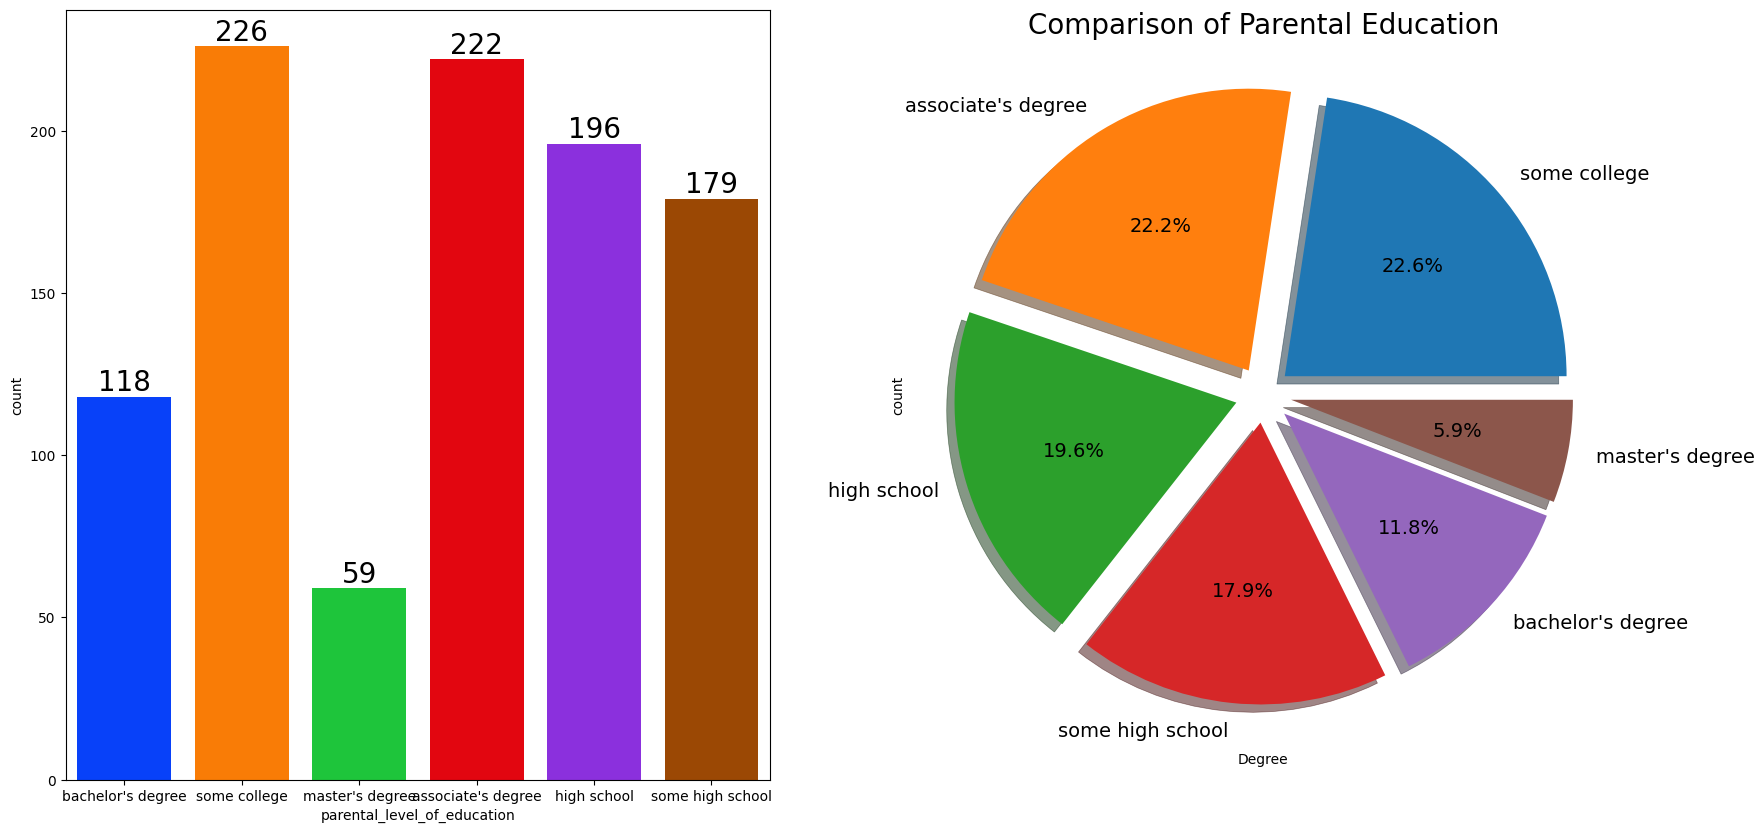

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'], data=df,palette = 'bright',ax=ax[0],saturation=0.95)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x = df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().index,explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()


##### Inshights
<li> Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )


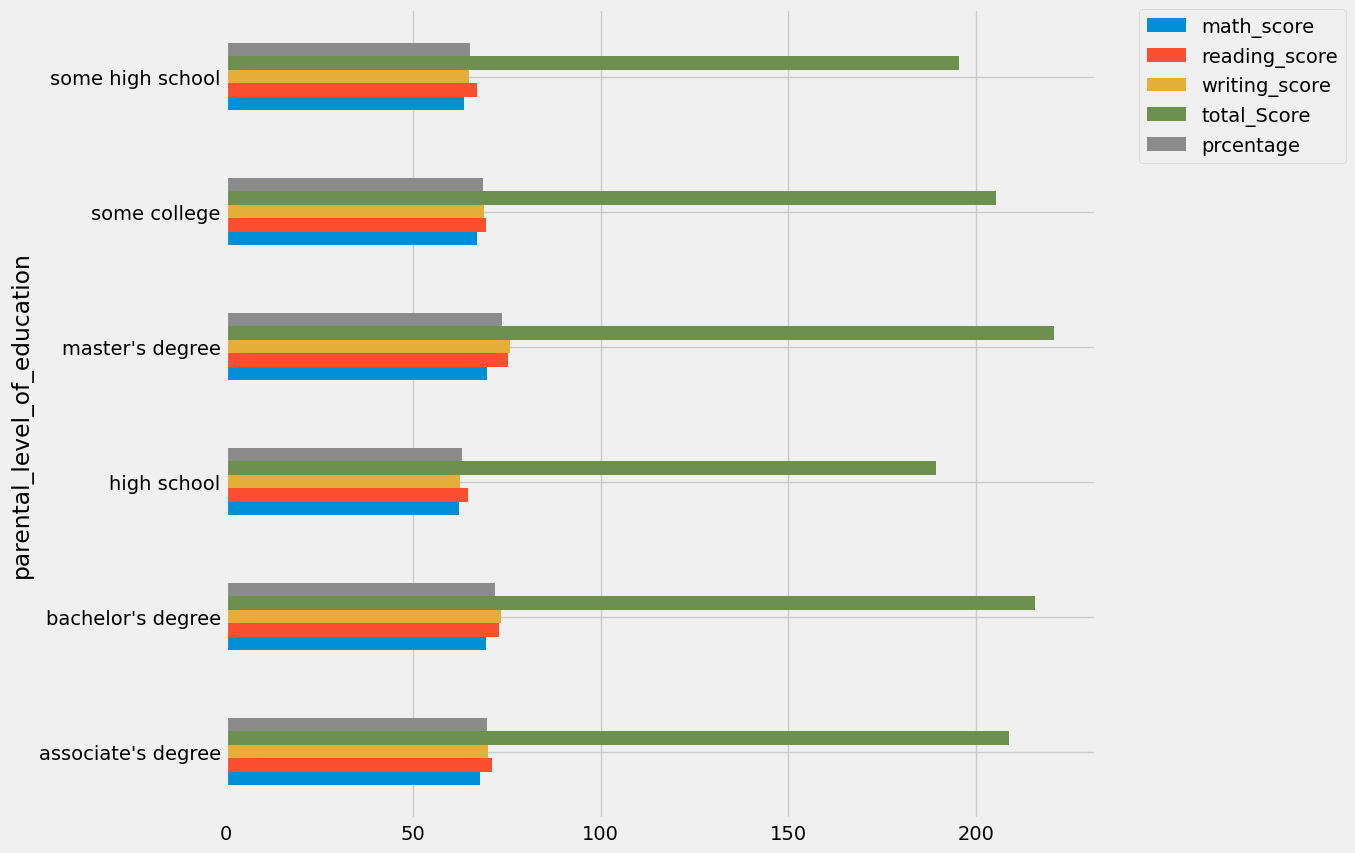

In [30]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights
<li> Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


### 4.4.4 LUNCH COLUMN
<li>Which type of lunch is most common amoung students ?
<li>What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )


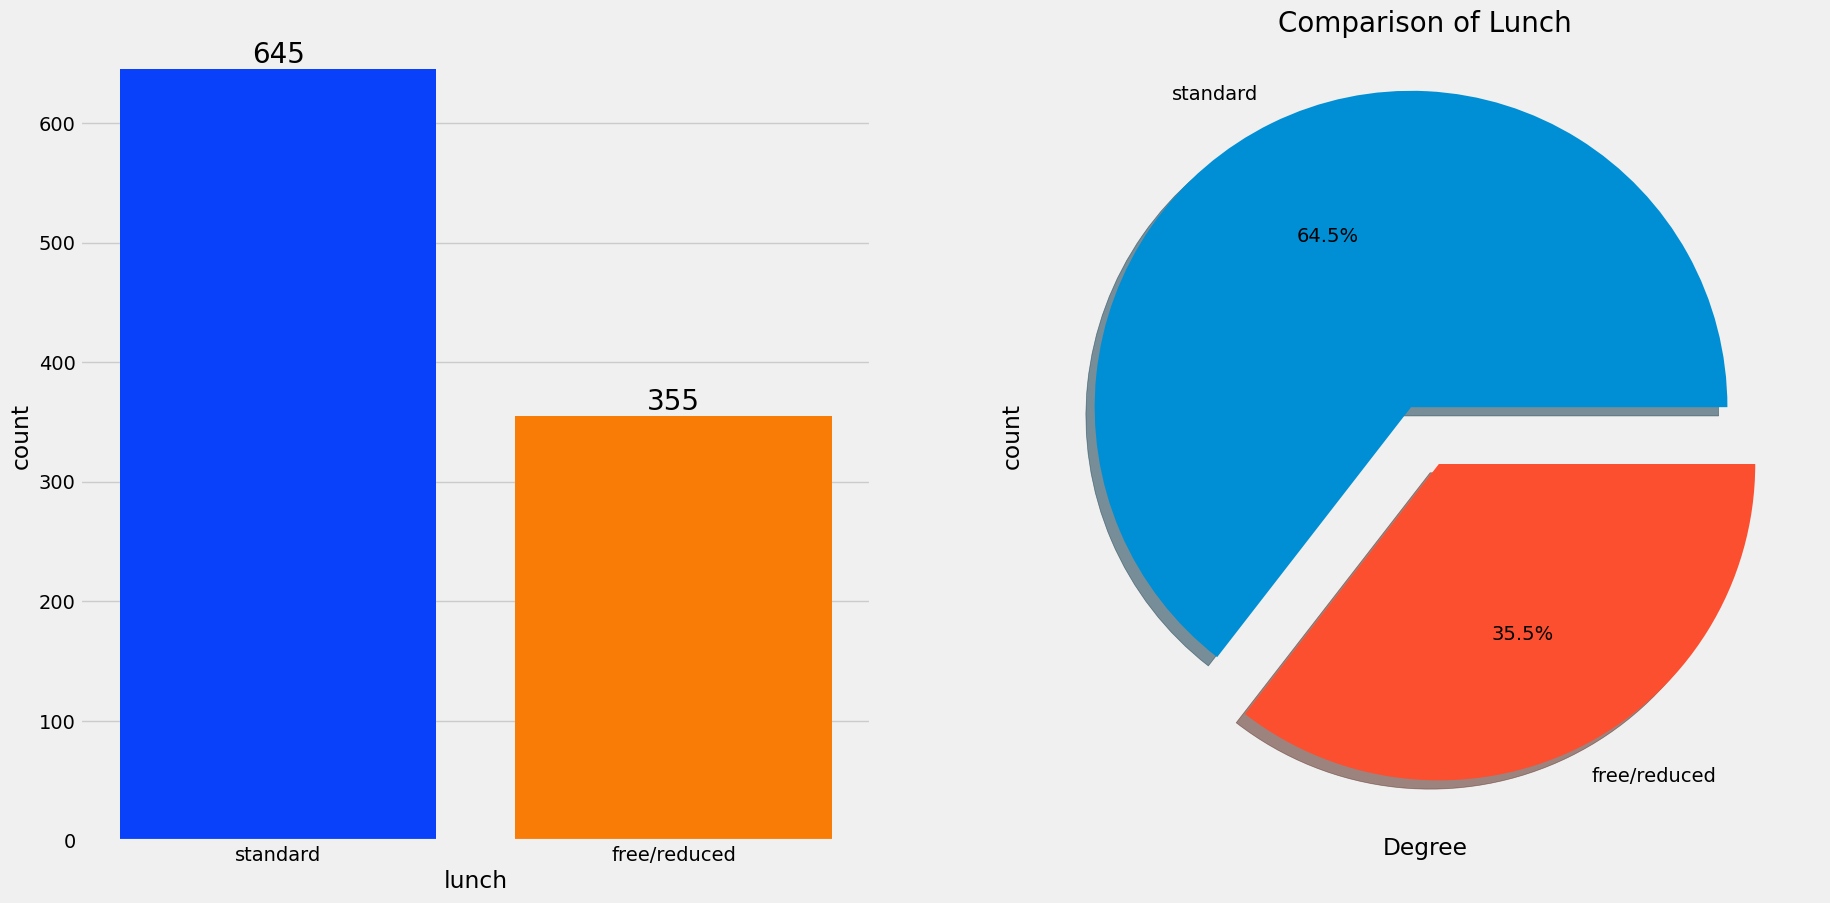

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['lunch'], data=df,palette = 'bright',ax=ax[0],saturation=0.95)
plt.title('Comparison of Lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x = df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()



##### Insights
<li> Students being served Standard lunch was more than free lunch


#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )


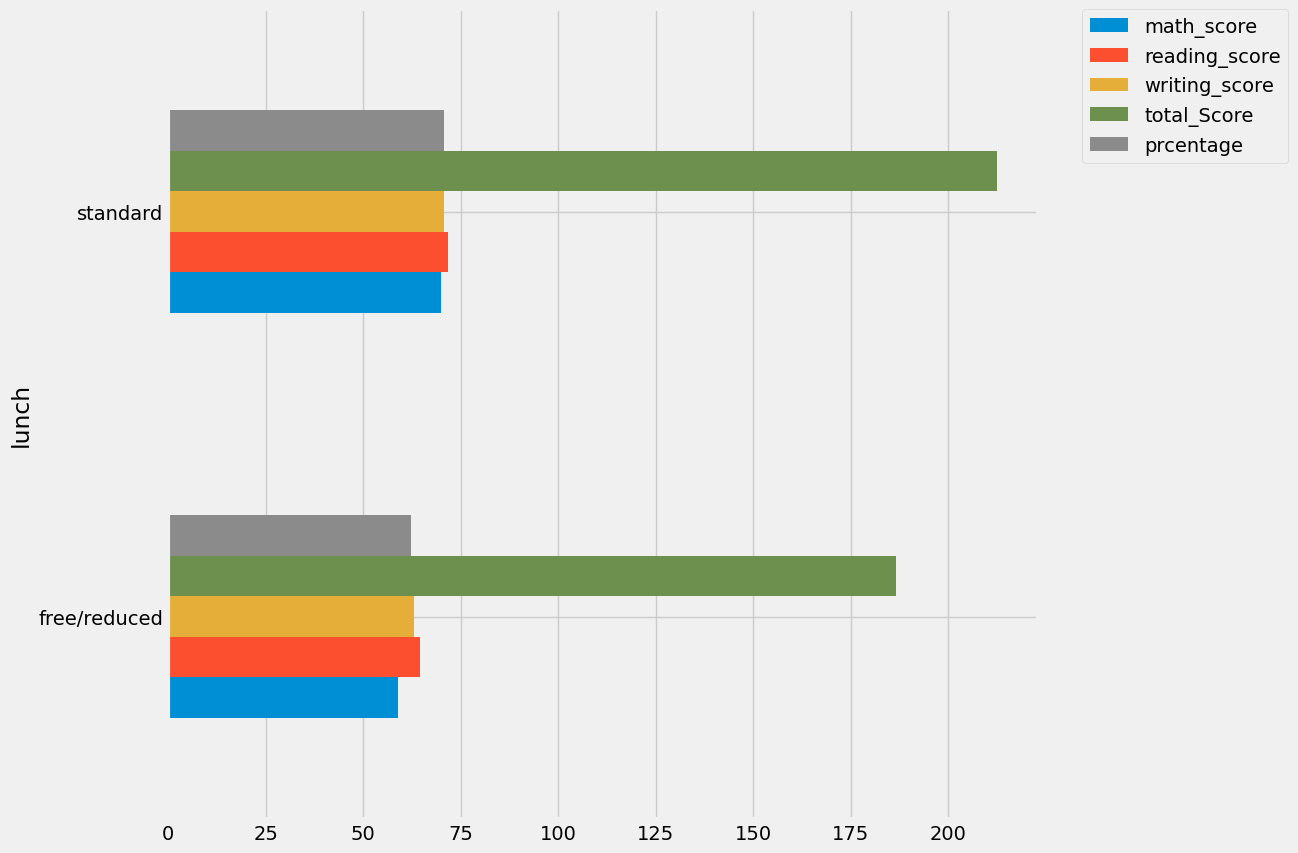

In [40]:
df.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights
<li>Students who get Standard Lunch tend to perform better than students who got free/reduced lunch


### 4.4.5 TEST PREPARATION COURSE COLUMN
<li>Which type of lunch is most common amoung students ?
<li>Is Test prepration course has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( Weather test prepartion course effect  ? )


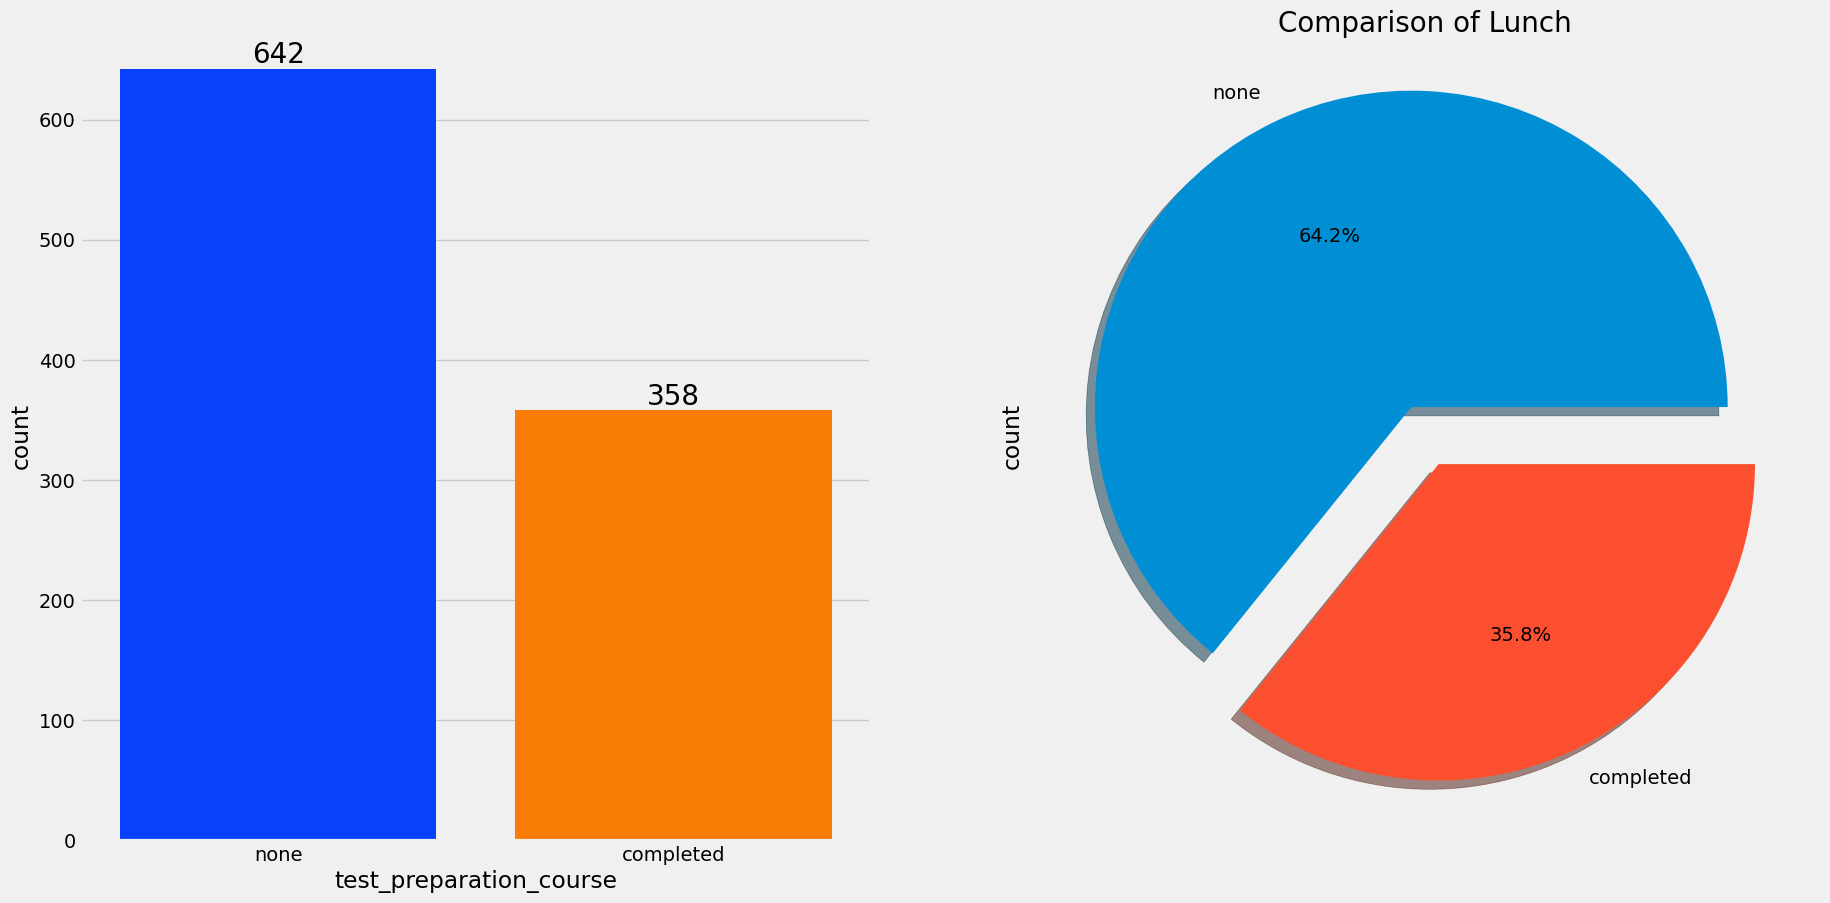

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['test_preparation_course'], data=df,palette = 'bright',ax=ax[0],saturation=0.95)
plt.title('Comparison of Lunch', fontweight = 30, fontsize = 20)
plt.xlabel('')
plt.ylabel('count')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x = df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().index,explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

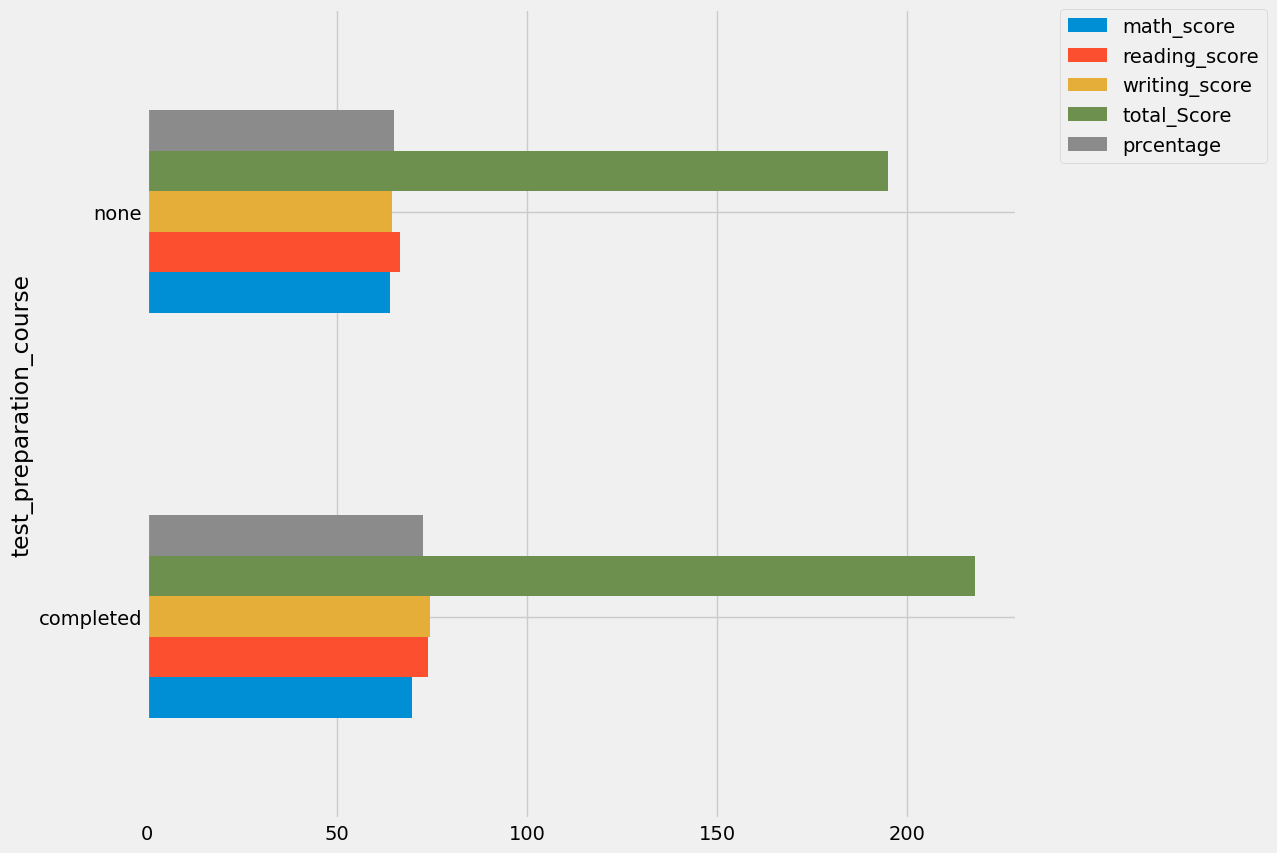

In [51]:
df.groupby('test_preparation_course').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights
<li>Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course
